<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/02_neural_network_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lessons: Neural Network Classification

##Binary Classification

###Loading Libraries

In [72]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###Data Preparation

In [73]:
#For this project we use the SkLearn library to load our data, known as toy datasets, primarily the make_circles dataset
n_sample = 1000
X, Y = make_circles(n_samples=n_sample, noise= 0.03, random_state=42)

# #lets do a dataframe using pandas to visualize our code in a table
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "Label": Y})

circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


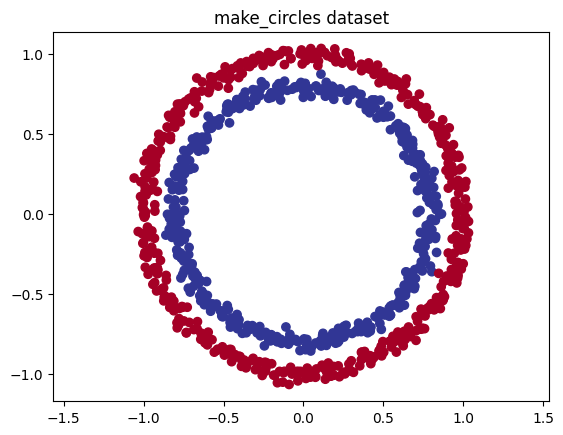

In [74]:
#Now lets visualize the dataset
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=Y,
            cmap=plt.cm.RdYlBu);
plt.axis('equal')
plt.title("make_circles dataset")
plt.show()

In [75]:
X_sample = X[0]
Y_sample = Y[0]

print(f"Values of one sample of X: {X_sample} and Value of one Sample of Y: {Y_sample}")
print(f"This is the shape of X: {X_sample.shape} and This is the shape of Y: {Y_sample.shape}")


Values of one sample of X: [0.75424625 0.23148074] and Value of one Sample of Y: 1
This is the shape of X: (2,) and This is the shape of Y: ()


In [76]:
#Now we have to convert our data from numpy to tensor

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

Y[:10], X[:10]

(tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]),
 tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]))

In [77]:
#Now lets split our data using scikit learn train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)



###Model Building

In [78]:
device = "cuda" if torch.cuda.is_available() else "cpu"

#Binary classification Model, Usually a combination of Linear and Nonlinear
class CircularModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1 = nn.Linear(in_features=2, out_features=64)     #Linear Layers, Input layer has 2 Units, Hidden layers have 10 units
    self.Layer2 = nn.Linear(in_features=64, out_features=128)
    self.Layer3 = nn.Linear(in_features=128, out_features=1)     #Linear Layers, Hidden layers have 10 units output Layer has 1 unit
    self.relu = nn.ReLU()  #Non Linear Layer

  def forward(self, x):
    return self.Layer3(self.relu(self.Layer2(self.relu(self.Layer1(x)))))

#setting random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = CircularModel()  #Creating an Instance of the Model

loss_fn = nn.BCEWithLogitsLoss()      #Loss Function for Binary classification
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)   #Optimizer for Binary classification, could be Adam as well

#Defining Accuracy Function
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred)) * 100

###Training The Model

In [79]:
epochs = 500

for epoch in range(epochs):
#Training Part
  model_0.train()

  #Forward pass
  y_pred_train_logits = model_0(X_train.to(device)).squeeze()         #Output from the Model, Usually termed as Logits
  y_pred_train = torch.round(torch.sigmoid(y_pred_train_logits))      #Converting Logits to Prediction Labels

  #Calculating the training Loss
  loss_train = loss_fn(y_pred_train_logits, Y_train)

  #Measuring Accuracy of Model
  accuracy_train = accuracy_fn(y_true=Y_train, y_pred=y_pred_train)

  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

#Testing Part
  model_0.eval()
  with torch.inference_mode():
    #Forward pass
    y_pred_test_logits = model_0(X_test.to(device)).squeeze()         #Output from the Model, Usually termed as Logits
    y_pred_test = torch.round(torch.sigmoid(y_pred_test_logits))      #Converting Logits to Prediction Labels

    #Calculating the testing Loss
    loss_test = loss_fn(y_pred_test_logits, Y_test)

    #Measuring Accuracy of Model
    accuracy_test = accuracy_fn(y_true=Y_test, y_pred=y_pred_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} || Training Loss: {loss_train: .5f}, Training Accuracy: {accuracy_train: .2f}% || Testing Loss: {loss_test: .5f}, Testing Accuracy: {accuracy_test: .2f}%")


Epoch: 0 || Training Loss:  0.69479, Training Accuracy:  46.38% || Testing Loss:  0.69246, Testing Accuracy:  51.50%
Epoch: 100 || Training Loss:  0.67294, Training Accuracy:  72.62% || Testing Loss:  0.67888, Testing Accuracy:  68.00%
Epoch: 200 || Training Loss:  0.64060, Training Accuracy:  87.12% || Testing Loss:  0.65167, Testing Accuracy:  82.50%
Epoch: 300 || Training Loss:  0.57005, Training Accuracy:  98.12% || Testing Loss:  0.59006, Testing Accuracy:  96.50%
Epoch: 400 || Training Loss:  0.43050, Training Accuracy:  99.50% || Testing Loss:  0.46532, Testing Accuracy:  98.50%


###Making Predictions

In [83]:
with torch.inference_mode():
  y_pred_test_logits = model_0(X_test.to(device)).squeeze()         #Output from the Model, Usually termed as Logits
  y_pred_test = torch.round(torch.sigmoid(y_pred_test_logits))      #Converting Logits to Prediction Labels
y_pred_test[:5] == Y_test[:5]

tensor([True, True, True, True, True])

#Visualizing The Outcome

In [84]:
#For this part 0f the code we are Importing for Daniel burkes custom Helper Function. This Par of the code was gotten from him as well
import requests
import pathlib
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py exists, skipping download


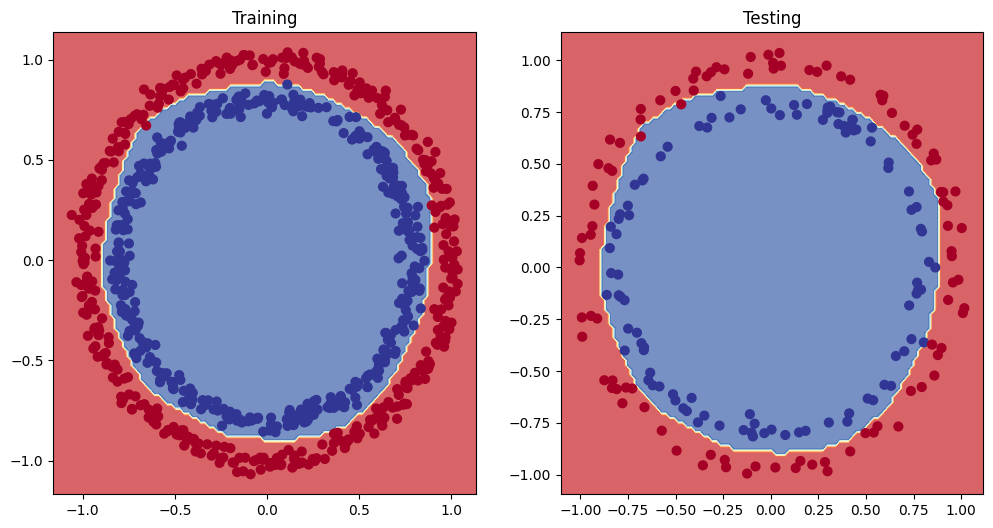

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test, Y_test)